Gold-Standard Documents Readability:

File: C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc1.docx
  Flesch Reading Ease:  56.94
  Flesch-Kincaid Grade: 8.58

File: C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc2.docx
  Flesch Reading Ease:  56.86
  Flesch-Kincaid Grade: 8.81

File: C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc3.docx
  Flesch Reading Ease:  45.1
  Flesch-Kincaid Grade: 10.65

File: C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc4.docx
  Flesch Reading Ease:  43.4
  Flesch-Kincaid Grade: 10.54

File: C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc5.docx
  Flesch Reading Ease:  -2.7
  Flesch-Kincaid Grade: 18.42

Gold-Standard Summary Statistics:
  Avg Flesch Reading Ease:  39.92 ± 22.06
  Avg Flesch-Kincaid Grade: 11.4 ± 3.61

New Document: C:\Users\rjone\OneDrive - Waterworksai.com\PharmaDS\NewShortCourseMaterials\SampleStudyDocuments\icdv1.docx
  Flesch Reading Ease:  25.23
  Flesch-Kincaid Grade: 15.04



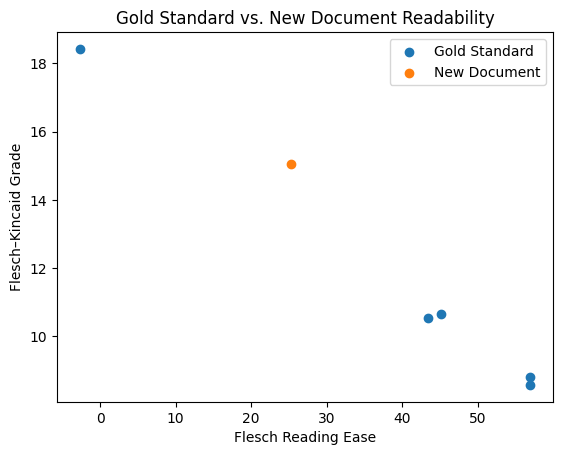

In [6]:
import re
import docx2txt
import statistics
import os
import matplotlib.pyplot as plt

# ---------------------
# Readability Functions
# ---------------------

def count_syllables(word: str) -> int:
    """
    A simple, naive syllable counting function:
    - Converts the word to lowercase.
    - Removes a trailing 'e' to approximate silent 'e'.
    - Counts consecutive vowels (a, e, i, o, u, y) as a single syllable group.
    """
    word = word.lower().strip()
    # Remove trailing punctuation
    word = re.sub(r'[^\w\s]', '', word)
    
    # Remove trailing 'e' if it exists
    if word.endswith('e'):
        word = word[:-1]
    
    # Count groups of vowels (including 'y')
    vowel_groups = re.findall(r'[aeiouy]+', word)
    
    # Ensure at least one syllable
    return max(1, len(vowel_groups))

def tokenize_sentences(text: str) -> list:
    """
    Tokenize text into sentences by splitting on punctuation that commonly ends sentences.
    This approach is simplistic; for better accuracy, use nltk or spacy.
    """
    sentences = re.split(r'[.!?]+', text)
    return [s.strip() for s in sentences if s.strip()]

def tokenize_words(text: str) -> list:
    """
    Tokenize text into words by splitting on whitespace and removing punctuation.
    This approach is simplistic; for better accuracy, use library-based tokenizers.
    """
    words = text.split()
    words = [re.sub(r'[^\w\s]', '', w) for w in words]
    return [w for w in words if w]

def flesch_reading_ease(num_words: int, num_sentences: int, num_syllables: int) -> float:
    """
    Flesch Reading Ease = 206.835 – (1.015 × (words / sentences)) – (84.6 × (syllables / words))
    """
    if num_sentences == 0 or num_words == 0:
        return 0.0
    return 206.835 - 1.015 * (num_words / num_sentences) - 84.6 * (num_syllables / num_words)

def flesch_kincaid_grade(num_words: int, num_sentences: int, num_syllables: int) -> float:
    """
    Flesch–Kincaid Grade Level = 0.39 × (words / sentences) + 11.8 × (syllables / words) – 15.59
    """
    if num_sentences == 0 or num_words == 0:
        return 0.0
    return 0.39 * (num_words / num_sentences) + 11.8 * (num_syllables / num_words) - 15.59

def calculate_flesch_kincaid_scores(text: str) -> dict:
    """
    Returns a dictionary with:
      - sentences (count)
      - words (count)
      - total_syllables (approx.)
      - flesch_reading_ease
      - flesch_kincaid_grade
    """
    sentences = tokenize_sentences(text)
    words = tokenize_words(text)
    num_sentences = len(sentences)
    num_words = len(words)
    total_syllables = sum(count_syllables(w) for w in words)

    fre = flesch_reading_ease(num_words, num_sentences, total_syllables)
    fk_grade = flesch_kincaid_grade(num_words, num_sentences, total_syllables)

    return {
        "sentences": num_sentences,
        "words": num_words,
        "total_syllables": total_syllables,
        "flesch_reading_ease": fre,
        "flesch_kincaid_grade": fk_grade
    }

# ------------------------------
# Main Code: Evaluate & Plot Data
# ------------------------------

if __name__ == "__main__":
    # 1) Define file paths for your gold standard documents
    gold_standard_docs = [
        r"C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc1.docx",
        r"C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc2.docx",
        r"C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc3.docx",
        r"C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc4.docx",
        r"C:\Users\rjone\OneDrive - Waterworksai.com\GroundTDoc5.docx"
    ]
    
    # 2) Define the file path for the new document you want to compare
    new_doc_path = r"C:\Users\rjone\OneDrive - Waterworksai.com\PharmaDS\NewShortCourseMaterials\SampleStudyDocuments\icdv1.docx"
    
    # Lists to store gold-standard Flesch Reading Ease (FRE) and Flesch–Kincaid Grade (FKG)
    gold_fre = []
    gold_fkg = []
    
    # Evaluate each gold-standard document
    print("Gold-Standard Documents Readability:\n")
    for doc_path in gold_standard_docs:
        if not os.path.exists(doc_path):
            print(f"File not found: {doc_path}")
            continue
        
        text = docx2txt.process(doc_path)
        scores = calculate_flesch_kincaid_scores(text)
        
        fre_val = round(scores["flesch_reading_ease"], 2)
        fkg_val = round(scores["flesch_kincaid_grade"], 2)
        
        gold_fre.append(scores["flesch_reading_ease"])
        gold_fkg.append(scores["flesch_kincaid_grade"])
        
        print(f"File: {doc_path}")
        print(f"  Flesch Reading Ease:  {fre_val}")
        print(f"  Flesch-Kincaid Grade: {fkg_val}\n")
    
    # Summary statistics for gold-standard docs
    if gold_fre and gold_fkg:
        avg_fre = statistics.mean(gold_fre)
        std_fre = statistics.pstdev(gold_fre)  # population std or statistics.stdev for sample
        avg_fkg = statistics.mean(gold_fkg)
        std_fkg = statistics.pstdev(gold_fkg)
        
        print("Gold-Standard Summary Statistics:")
        print(f"  Avg Flesch Reading Ease:  {round(avg_fre, 2)} ± {round(std_fre, 2)}")
        print(f"  Avg Flesch-Kincaid Grade: {round(avg_fkg, 2)} ± {round(std_fkg, 2)}\n")
    else:
        print("No gold-standard documents processed. Please check file paths.\n")
    
    # 3) Evaluate the new document (icdv1)
    if os.path.exists(new_doc_path):
        new_text = docx2txt.process(new_doc_path)
        new_scores = calculate_flesch_kincaid_scores(new_text)
        new_fre = round(new_scores["flesch_reading_ease"], 2)
        new_fkg = round(new_scores["flesch_kincaid_grade"], 2)
        
        print(f"New Document: {new_doc_path}")
        print(f"  Flesch Reading Ease:  {new_fre}")
        print(f"  Flesch-Kincaid Grade: {new_fkg}\n")
    else:
        print(f"File not found: {new_doc_path}")
        new_fre = None
        new_fkg = None
    
    # 4) Plot Gold Standard vs. New Document
    #    We'll create a scatter plot of FRE (x-axis) vs. FKG (y-axis) for gold standards,
    #    then add the new doc's data point.

    if gold_fre and gold_fkg and (new_fre is not None) and (new_fkg is not None):
        plt.scatter(gold_fre, gold_fkg, label="Gold Standard")
        plt.scatter([new_fre], [new_fkg], label="New Document")
        
        plt.xlabel("Flesch Reading Ease")
        plt.ylabel("Flesch–Kincaid Grade")
        plt.title("Gold Standard vs. New Document Readability")
        plt.legend()
        plt.show()
    else:
        print("Skipping plot because either gold-standard or new document data is missing.")
